In [1]:
#import basic libraries
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Tensorflow version: 2.9.2
Keras version: 2.9.0


# Exercise 1 FMNIST

In [2]:
#loading the dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
#since we are building an encoder decoder we don't need the labels hence they will be ignored at the end
(x_train, y_train),(x_test,y_test) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#basic analysis

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
np.max(x_train[0])

255

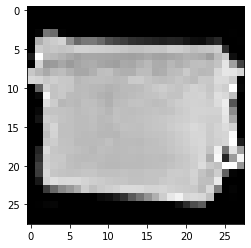

In [7]:
#viewing the data
plt.imshow(x_train[12345],cmap = 'gray')

In [8]:
#finding the dimension of each image
print("Dimension of each image: ",x_train[0].shape)

Dimension of each image:  (28, 28)


In [9]:
#need to normalize it

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [11]:
#building a simple autoencoder
import keras
from keras import layers

In [12]:
encoding_dim = 64
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim,activation='relu')(input_img)

decoded = layers.Dense(784,activation='sigmoid')(encoded)

In [13]:
#maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [14]:
#maps input to its encoded representation
encoder = keras.Model(input_img,encoded)

In [15]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#training the autoencoder for 10 epochs
history = autoencoder.fit(x_train, x_train,
                epochs=10,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 0.0521 - val_loss: 0.0288
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0241 - val_loss: 0.0207
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0180 - val_loss: 0.0161
Epoch 4/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0148 - val_loss: 0.0139
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0121 - val_loss: 0.0118
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0104 - val_loss: 0.0103
Epoch 10/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0100 - val_los

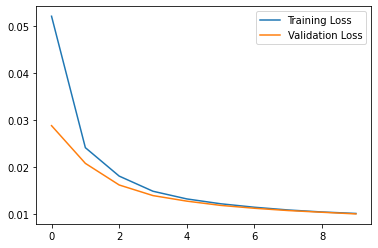

In [18]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Original and Reconstructed Images

In [19]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


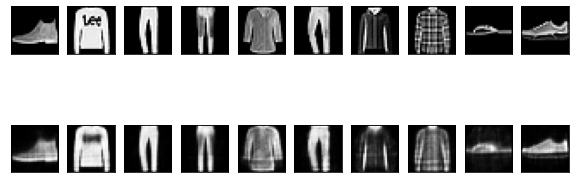

In [20]:
#plotting the images
n = 10  # How many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Exercise 2 ECG5000

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#downloading the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
print(dataframe.shape)
dataframe.head()

(4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [23]:
#this is because the last element contains the tables
labels = raw_data[:, -1]

In [24]:
#electrocardiogram data
data = raw_data[:, 0:-1]

In [25]:
#splitting the data into training and testing
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

In [26]:
# Normalize to 0 - 1
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

In [27]:
print("min-val: ",min_val )
print("max-val: ",max_val )

min-val:  tf.Tensor(-6.2808752, shape=(), dtype=float64)
max-val:  tf.Tensor(7.4021031, shape=(), dtype=float64)


In [28]:
#normalizing 
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

In [29]:
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [30]:
#converting 0 and 1 to False and True where True signifies Normal ECG patterns
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [31]:
#seperating normal
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

In [32]:
#seperating abnormal
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [33]:
train_data

<tf.Tensor: shape=(3998, 140), dtype=float32, numpy=
array([[0.51649326, 0.39186087, 0.27047953, ..., 0.5660683 , 0.5589097 ,
        0.43635577],
       [0.49548042, 0.44280598, 0.4081048 , ..., 0.4507692 , 0.43279642,
        0.47883955],
       [0.36454403, 0.25480282, 0.23604798, ..., 0.48411715, 0.5098176 ,
        0.46529934],
       ...,
       [0.38359913, 0.2535248 , 0.19675317, ..., 0.57362676, 0.5888627 ,
        0.5138899 ],
       [0.3426399 , 0.27914286, 0.27455595, ..., 0.38026804, 0.40731877,
        0.4849011 ],
       [0.31683815, 0.1783498 , 0.16708295, ..., 0.52860236, 0.5235717 ,
        0.3591931 ]], dtype=float32)>

In [34]:
normal_test_data

<tf.Tensor: shape=(591, 140), dtype=float32, numpy=
array([[0.69334304, 0.5924179 , 0.39133146, ..., 0.47963983, 0.4403751 ,
        0.46996233],
       [0.38745424, 0.2766021 , 0.19223337, ..., 0.4901993 , 0.44651622,
        0.32389393],
       [0.41598254, 0.26077873, 0.16128398, ..., 0.5388589 , 0.56605256,
        0.45980278],
       ...,
       [0.27362037, 0.13307126, 0.13977347, ..., 0.53129935, 0.5619287 ,
        0.5236891 ],
       [0.36561728, 0.23049016, 0.16807607, ..., 0.48923767, 0.5483348 ,
        0.5082465 ],
       [0.47327912, 0.25492436, 0.14695698, ..., 0.49476743, 0.5408083 ,
        0.3732302 ]], dtype=float32)>

In [35]:
anomalous_train_data

<tf.Tensor: shape=(1670, 140), dtype=float32, numpy=
array([[0.49548042, 0.44280598, 0.4081048 , ..., 0.4507692 , 0.43279642,
        0.47883955],
       [0.44046444, 0.36894065, 0.36445   , ..., 0.31114936, 0.31802037,
        0.47918323],
       [0.39877972, 0.35419655, 0.34833813, ..., 0.3233607 , 0.36254522,
        0.4611615 ],
       ...,
       [0.4408393 , 0.36062333, 0.32344392, ..., 0.3003291 , 0.35812965,
        0.43139088],
       [0.43803248, 0.37139475, 0.3447319 , ..., 0.3070529 , 0.3634946 ,
        0.46456385],
       [0.3426399 , 0.27914286, 0.27455595, ..., 0.38026804, 0.40731877,
        0.4849011 ]], dtype=float32)>

In [36]:
#plotting normal and abnormal ECG curves

In [37]:
#normal

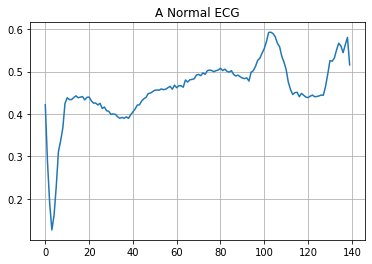

In [38]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[10])
plt.title(f"A Normal ECG")
plt.show()

In [39]:
#anomolous

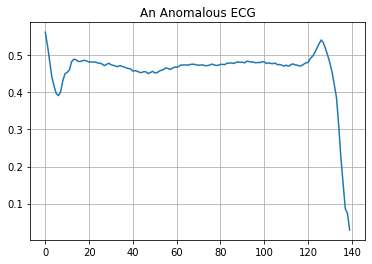

In [40]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[10])
plt.title("An Anomalous ECG")
plt.show()

In [41]:
#building the model

In [44]:
from tensorflow.keras.models import Model

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [45]:
autoencoder.compile(optimizer='adam', loss='mae')

In [46]:
#autoencoder needs to be trained only on normal ECG but has to be evaluated on the complete data

In [47]:
history = autoencoder.fit(normal_train_data, normal_train_data,epochs=10, 
          batch_size=512,validation_data=(test_data, test_data),shuffle=True)

Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 0.0607 - val_loss: 0.0538
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 0.0562 - val_loss: 0.0521
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0543 - val_loss: 0.0504
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0517 - val_loss: 0.0486
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0485 - val_loss: 0.0474
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0455 - val_loss: 0.0458
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0422 - val_loss: 0.0434
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0388 - val_loss: 0.0415
Epoch 9/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0357 - val_loss: 0.0404
Epoch 10/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0330 - val_loss: 0.0393


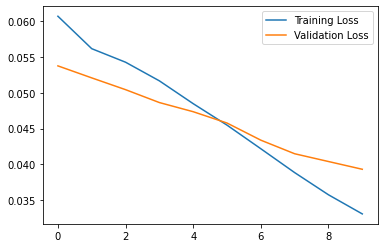

In [48]:
#plotting the graph
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [49]:
#classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples.

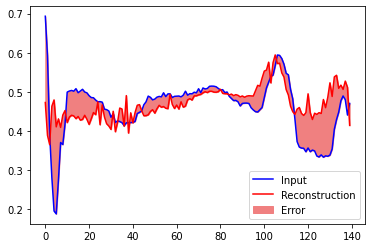

In [50]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [51]:
#detecting anomalies by calculating whether reconstruction loss is greater than one standard deviation 

In [52]:
reconstructions = autoencoder.predict(train_data)#(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions,train_data) #normal_train_data)

125/125 [==============================] - 0s 1ms/step


In [53]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.051264107


In [54]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

13/13 [==============================] - 0s 1ms/step


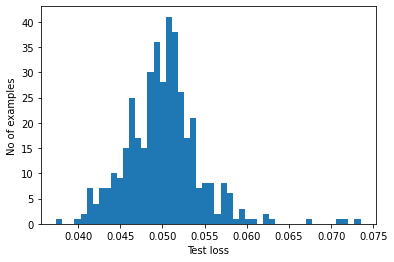

In [55]:
#plotting a graph for the anomalous data to see its distribution wrt the threshold
plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [59]:
#classification of ECG as anomalous or not 

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [60]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.706
Precision = 0.68
Recall = 0.949238578680203
